## Honors Project

Supermarket Sales Data: This dataset records individual transactions from a supermarket chain in Myanmar, with detailed attributes for each sale. The data includes the following columns:

---

* Invoice ID: Unique identifier for each transaction.
* Branch: The branch location of the supermarket (e.g., Yangon, Naypyitaw, Mandalay).
* City: The city in which the supermarket branch is located.
* Customer Type: Indicates whether the customer is a 'Member' or 'Normal'.
* Gender: Gender of the customer.
* Product Line: The category of the product sold (e.g., Health & Beauty, Electronic Accessories, Home & Lifestyle).
* Unit Price: Price per unit of the product.
* Quantity: Number of items purchased.
* Tax 5%: Calculated tax amount on the transaction at a 5% rate.
* Total: Total amount for the transaction including tax.
* Date: Date of the transaction.
* Time: Time of the transaction.
* Payment: Payment method used (e.g., Cash, Ewallet, Credit card).
* COGS: Cost of goods sold, representing the raw cost of the products.
* Gross Margin Percentage: Fixed percentage of profit for each sale (4.7619%).
* Gross Income: Profit earned from the transaction.
* Rating: Customer satisfaction rating (out of 10).

---

In this notebook first we will examine the data, then we will look for the missing values, outliers and correlations. Finally we will do some hypotheses tests.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 
import warnings

warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


The `isnull().sum()` function provides the missing variables information about the dataframe.

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In here we will look for the outliers in the numeric columns

In [8]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)

    # NaN veya inf değerleri temizle
    col_data = dataframe[col_name].dropna() 
    col_data = col_data[~col_data.isin([np.inf, -np.inf])]  

    if col_data[(col_data > up_limit) | (col_data < low_limit)].any():
        return True
    else:
        return False

In [9]:
num_cols = df.select_dtypes(['int64','float64'])
for col in num_cols:
    print("***** ", col, "*****")
    print(check_outlier(df, col))
    print("********************\n")

*****  Unit price *****
False
********************

*****  Quantity *****
False
********************

*****  Tax 5% *****
True
********************

*****  Total *****
True
********************

*****  cogs *****
True
********************

*****  gross margin percentage *****
False
********************

*****  gross income *****
True
********************

*****  Rating *****
False
********************



As you see in the dataframe there is some outliers for 0.25 and 0.75 quantiles.

---

Here we will look correlations for numeric columns.

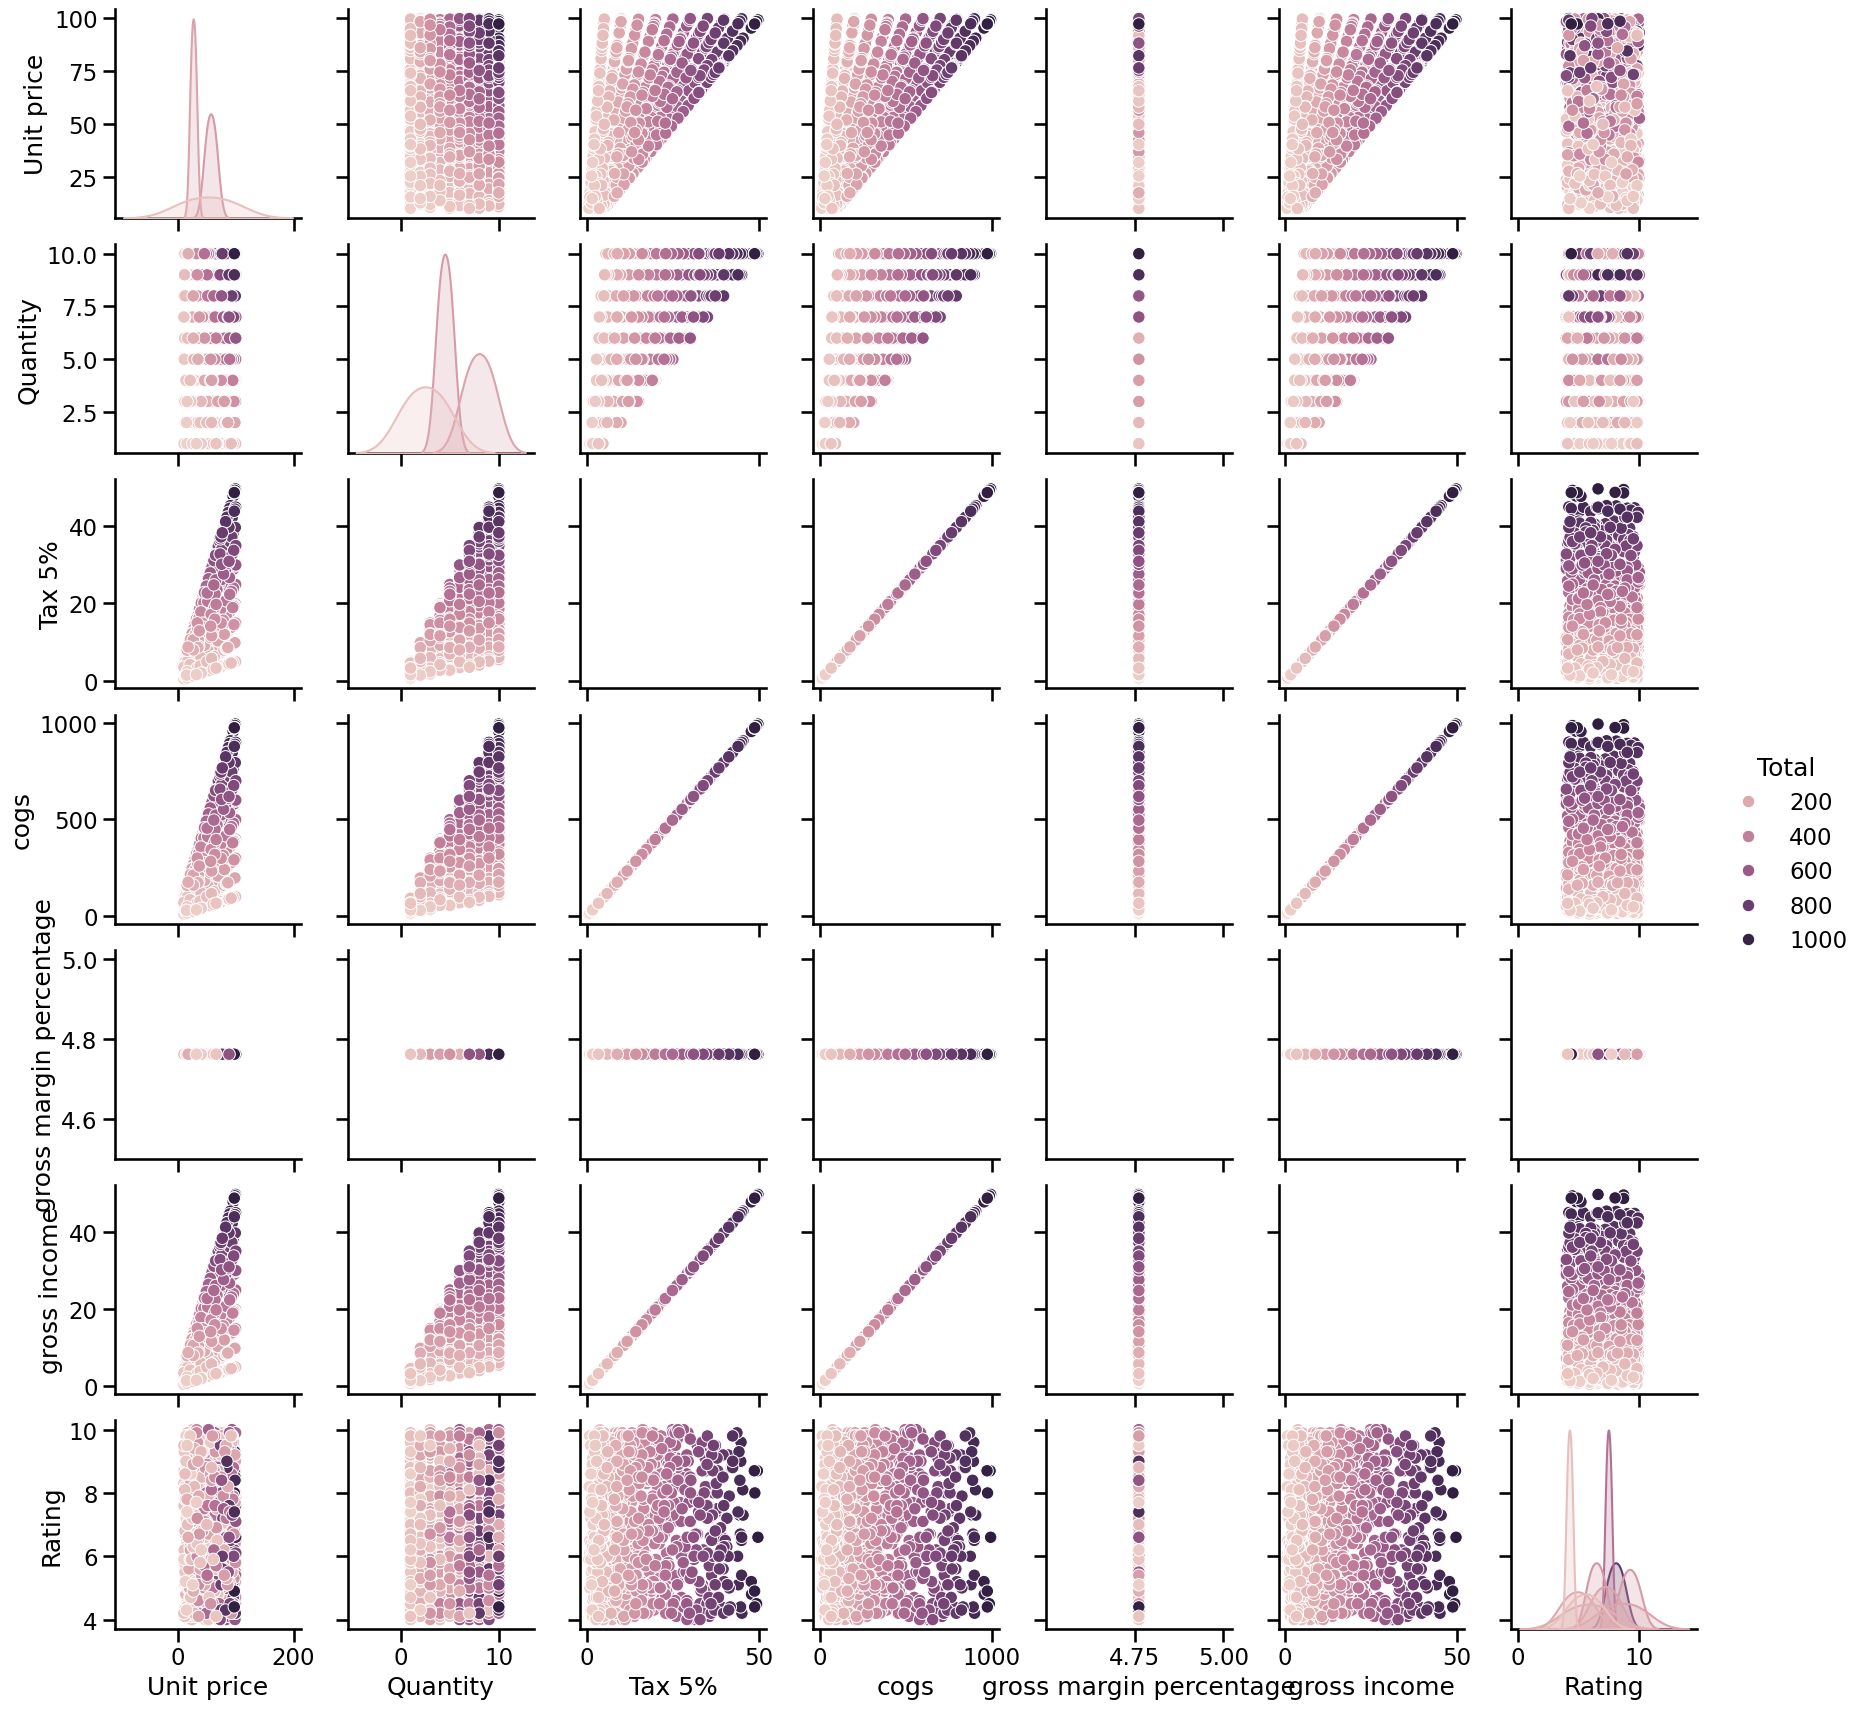

In [10]:
sns.set_context('talk')
sns.pairplot(df, hue='Total');
plt.show()

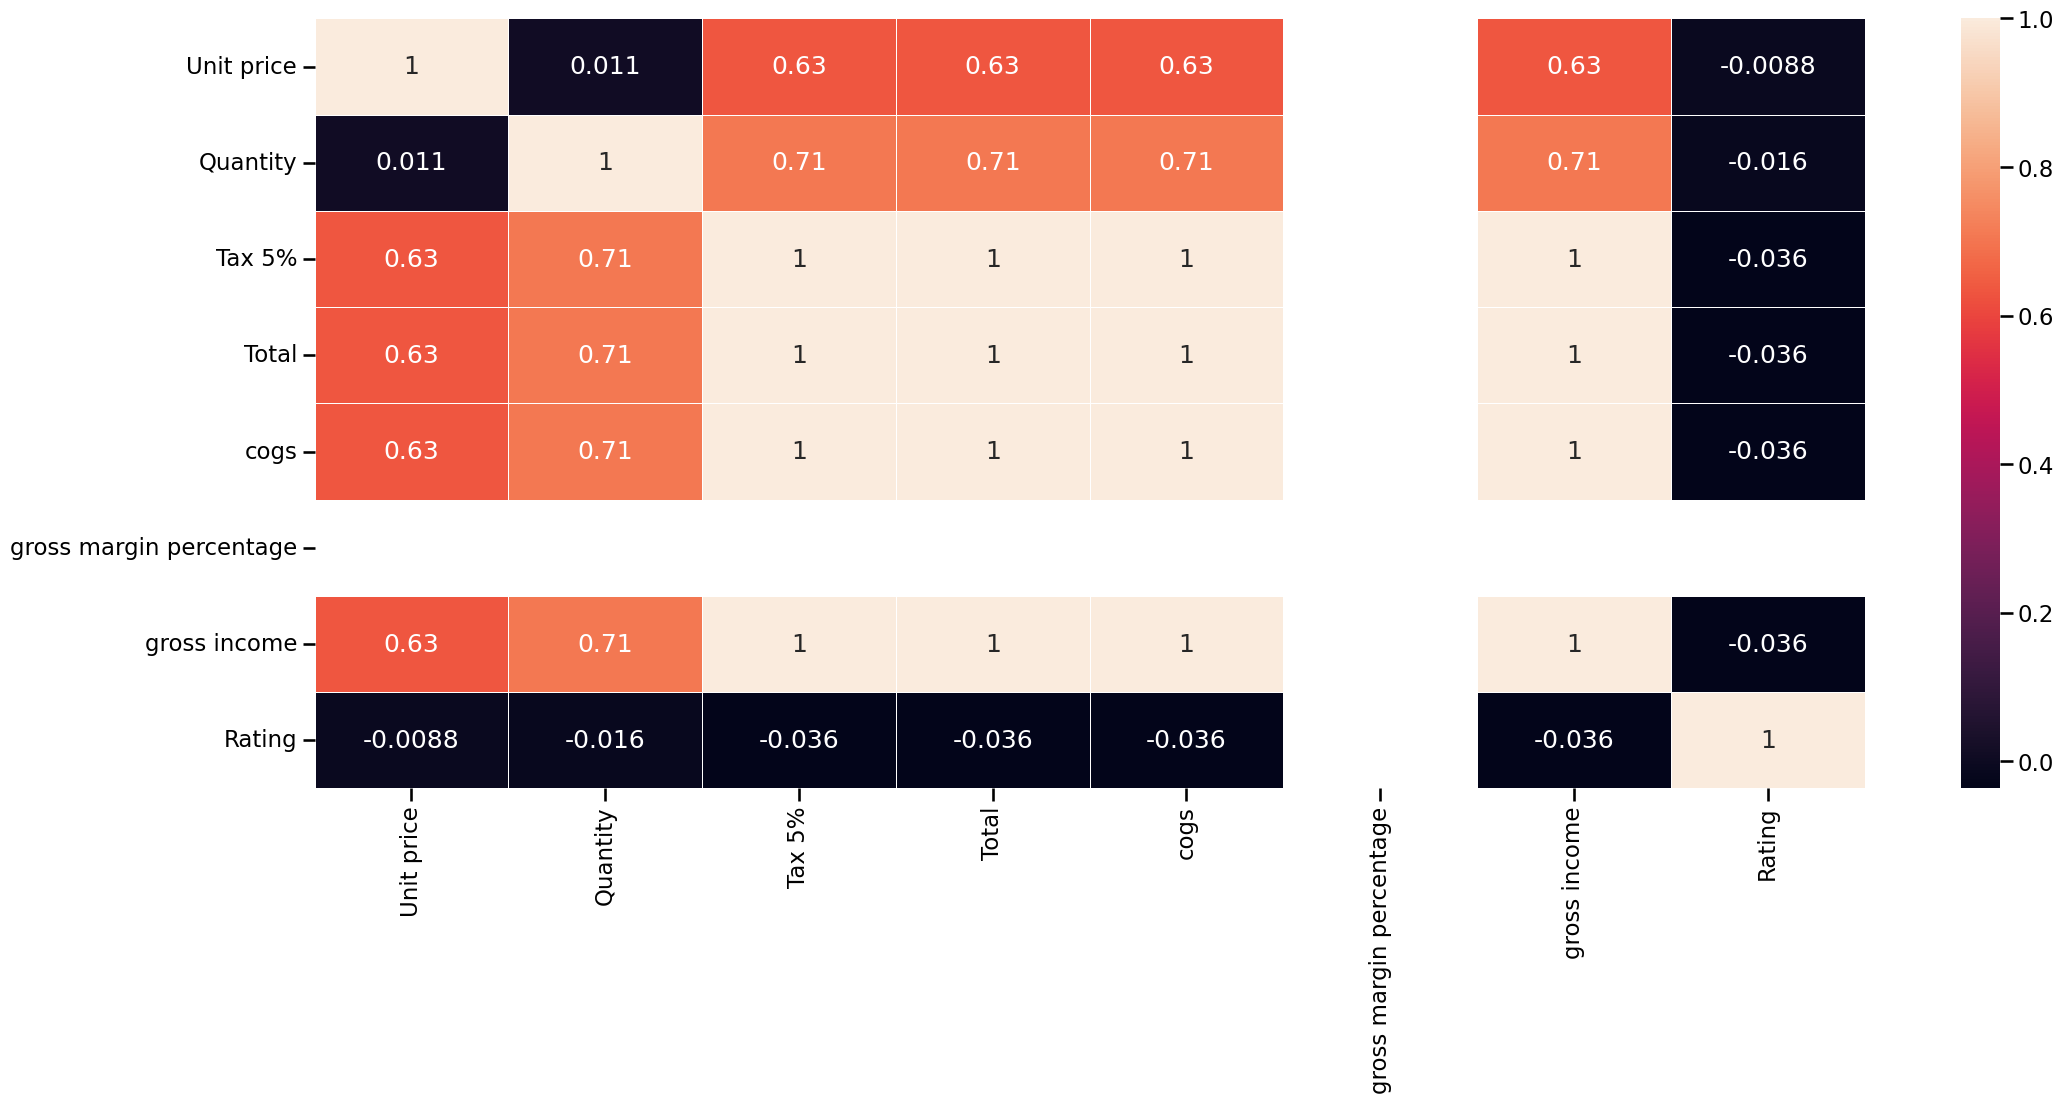

In [11]:
corr = num_cols.corr()
cor_matrix = corr.abs()
fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(num_cols.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

As you can see most of the numeric columns are highly correlated.

---

In here we will drop `Invoice ID` column because this column is not distinctive.

In [12]:
df.drop(columns='Invoice ID', inplace=True)

In feature engineering we will implement Hour and Timezone columns.

In [13]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Hour, Length: 1000, dtype: int32

In [14]:
df['Timezone'] = pd.cut(df.Hour, [6,12,18,24], labels=['Morning','Afternoon','Evening'])
df['Timezone'] 

0      Afternoon
1        Morning
2      Afternoon
3        Evening
4        Morning
         ...    
995    Afternoon
996    Afternoon
997    Afternoon
998    Afternoon
999    Afternoon
Name: Timezone, Length: 1000, dtype: category
Categories (3, object): ['Morning' < 'Afternoon' < 'Evening']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Branch                   1000 non-null   object  
 1   City                     1000 non-null   object  
 2   Customer type            1000 non-null   object  
 3   Gender                   1000 non-null   object  
 4   Product line             1000 non-null   object  
 5   Unit price               1000 non-null   float64 
 6   Quantity                 1000 non-null   int64   
 7   Tax 5%                   1000 non-null   float64 
 8   Total                    1000 non-null   float64 
 9   Date                     1000 non-null   object  
 10  Time                     1000 non-null   object  
 11  Payment                  1000 non-null   object  
 12  cogs                     1000 non-null   float64 
 13  gross margin percentage  1000 non-null   float64 
 14  gross inc

### **Hypotheses Tests**

$ 𝐻_{01}:\mu_{1}-\mu_{2} = 0 $ There is no difference between the Total Price of females and Total Price of males. \
$ 𝐻_{A1}:\mu_{1}-\mu_{2} \ne 0 $ There is a difference between the Total Price of females and Total Price of males.

$ 𝐻_{02}:\mu_{3} = \mu_{4} = \mu_{5} $ There is no difference between the Total Price of Timezones. \
$ 𝐻_{A2}:\mu_{3} \ne \mu_{4} \ne \mu_{5} $ There is a difference between the Total Price of Timezones.

$ 𝐻_{03}:\mu_{6} = \mu_{7} = \mu_{8} $ There is no difference between the Hour of Payment Types. \
$ 𝐻_{A3}:\mu_{6} \ne \mu_{7} \ne \mu_{8} $ There is a difference between the Hour of Payment Types.

$ 𝐻_{03}:\mu_{9} = \mu_{10} $ There is no difference between the Rating of Customer Types. \
$ 𝐻_{A3}:\mu_{9} \ne \mu_{10} $ There is a difference between the Rating of Customer Types.

---

In here we will test the $ 𝐻_{01} $ and $ 𝐻_{A1} $ Hypotheses Tests

In [16]:
df.groupby(df.Gender)['Total'].mean()

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

In [17]:
female_total = df.loc[df.Gender=="Female"]['Total']
male_total = df.loc[df.Gender=="Male"]['Total']

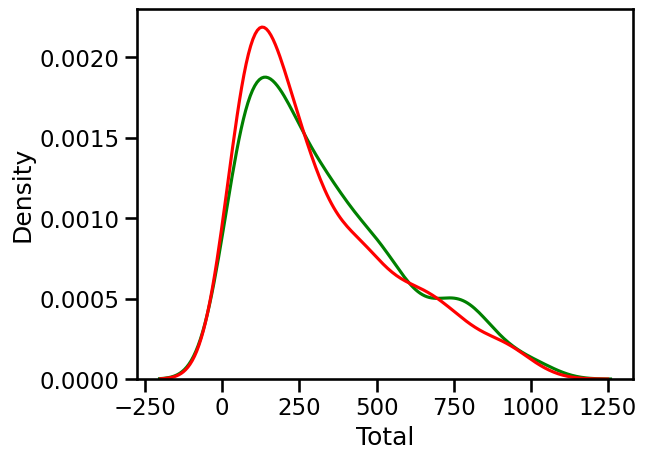

In [18]:
sns.kdeplot(female_total, color='green', label='Female')
sns.kdeplot(male_total, color='red', label='Male')
plt.show()

In [19]:
alpha=0.05
t_value, p_value = stats.ttest_ind(male_total, female_total)
print("t_value = ",t_value, ", p_value = ", p_value)

t_value =  -1.5641266415241026 , p_value =  0.11810484577135676


In [20]:
if p_value <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value,alpha))
    print("Reject the null hypothesis that there is no difference between Total Price of females and Total Price of males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value,alpha))
    print("Fail to reject the null hypothesis that there is a difference between Total Price of females and Total Price of males.")

Conclusion: since p_value 0.11810484577135676 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is a difference between Total Price of females and Total Price of males.


### Suggestions For Deeper Analysis
To gain deeper insights into consumer spending behavior, we can analyze the dataset based on cities, product types, and dates. By examining spending patterns across different cities, we can identify regional preferences and variations in purchasing power. Analyzing expenditures by product type will help us understand which categories are most popular and how consumer demand shifts across different regions. Additionally, a time-based analysis will allow us to detect seasonal trends, peak shopping periods, and any anomalies in spending behavior. By combining these dimensions, we can uncover valuable trends and correlations, enabling data-driven decision-making for marketing strategies, inventory planning, and targeted promotions.

---

### Data Quality

The dataset appears to be of sufficient quality, with well-structured and meaningful information for analyzing spending patterns. However, the number of observations is somewhat limited, which may affect the robustness of certain insights. Additionally, the tax rate may vary across different products, introducing a potential source of error in the analysis. To enhance the accuracy of our findings, it would be helpful to verify the consistency of tax rates across product categories. Furthermore, incorporating an additional variable that indicates the proximity of each date to public holidays could provide valuable context, as spending behavior often fluctuates around holiday periods. If available, these additional data points would significantly improve the depth and reliability of our analysis.